In [ ]:
# Data used: the 2019 Index of Economic Freedom (ief) public data from https://www.heritage.org/index/ is used
# Here new metrics with new criteria (features) is introduced for arriving at a score ranking the world countries
# Examining this new metrics is the motivation for this project based on the following reasoning:
    # In our days, new metrics are introduced to rank or explain different things and phenomena
        # It is not always clear that the new metrics and its results have any logic behind or make any sense
    # So, our goal is:
        # to examine the new metrics feature behavior
        # to determine if these features or part of them play a significant role in the overal score
        # to determine whether the overall score can be accurately predicted using these features
# If the answers from our investigation are positive, then we will be more willing to accept the new metric and results
# If the answers are negative, then we should be higly sceptical of this new metrics and the results presented

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.5)

In [2]:
# read ief data

data = pd.read_excel('index2019_data.xls')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
CountryID                      186 non-null int64
Country Name                   186 non-null object
WEBNAME                        186 non-null object
Region                         186 non-null object
World Rank                     180 non-null float64
Region Rank                    180 non-null float64
2019 Score                     180 non-null float64
Property Rights                185 non-null float64
Judical Effectiveness          185 non-null float64
Government Integrity           185 non-null float64
Tax Burden                     180 non-null float64
Gov't Spending                 183 non-null float64
Fiscal Health                  183 non-null float64
Business Freedom               185 non-null float64
Labor Freedom                  184 non-null float64
Monetary Freedom               184 non-null float64
Trade Freedom                  182 non-null float64
Investment Freed

In [4]:
data.head(10)

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,69.6,2.505,2.9,1957.58,8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,36,3.900,2.5,12506.6,13.9,2.0,1119.1,71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,632.9,2.000,3.1,15237.2,10,5.6,1203.0,25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,190.3,0.700,2.9,6752.58,8.2,31.7,-2254.5,65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,920.2,2.900,0.7,20875.8,8.7,25.7,11857.0,52.6
5,6,Armenia,Armenia,Europe,47.0,24.0,67.7,57.2,46.3,38.6,...,Armenia,3,28.3,7.500,3.6,9455.94,18.2,0.9,245.7,53.5
6,7,Australia,Australia,Asia-Pacific,5.0,4.0,80.9,79.1,86.5,79.9,...,Australia,24.8,1246.5,2.300,2.4,50333.7,5.6,2.0,46368.0,41.6
7,8,Austria,Austria,Europe,31.0,16.0,72.0,84.2,71.3,77.4,...,Austria,8.8,439.6,2.900,1.3,49868.7,5.5,2.2,9629.6,78.8
8,9,Azerbaijan,Azerbaijan,Asia-Pacific,60.0,13.0,65.4,59.1,53.1,44.7,...,Azerbaijan,9.8,171.8,0.100,1.2,17492.4,5,13.0,2867.0,54.7
9,10,Bahamas,Bahamas,Americas,76.0,15.0,62.9,42.2,46.9,43.7,...,Bahamas,0.4,11.6,1.300,-0.7,31139.4,12.6,1.4,927.7,57.2


In [5]:
data.columns

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', '2019 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ', 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [ ]:
# one can see that the data comprises of well-known criteria such as 
    # 'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)', '5 Year GDP Growth Rate (%)', \
    # 'GDP per Capita (PPP)','Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)','Public Debt (% of GDP)'
# and new criteria which determine the ief score
# here we focus on these new criteria and new raniking score

In [6]:
# select the factors contributing to the overall ief score (from https://www.heritage.org/index/)

data_ief = data[['Property Rights', 'Judical Effectiveness', 'Government Integrity', 'Tax Burden', "Gov't Spending",
              'Fiscal Health', 'Business Freedom', 'Labor Freedom', 'Monetary Freedom', 'Trade Freedom', 'Investment Freedom ', 
                 'Financial Freedom', '2019 Score']]
data_ief.head(5)

,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,2019 Score
0,19.6,29.6,25.2,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10.0,10.0,51.5
1,54.8,30.6,40.4,86.3,73.9,80.6,69.3,52.7,81.5,87.8,70.0,70.0,66.5
2,31.6,36.2,28.9,76.4,48.7,18.7,61.6,49.9,74.9,67.4,30.0,30.0,46.2
3,35.9,26.6,20.5,83.9,80.7,58.2,55.7,58.8,55.4,61.2,30.0,40.0,50.6
4,47.8,44.5,33.5,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55.0,60.0,52.2


In [ ]:
# the target is 2019Score and the rest of the columns are the predictors (features)

In [ ]:
# 1) EDA

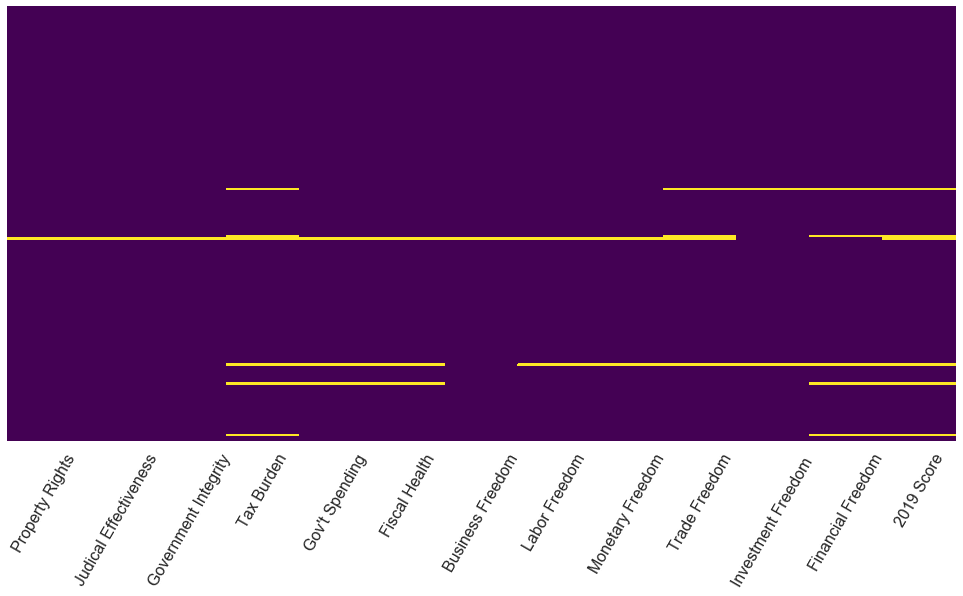

In [7]:
# visualize nulls in data
# please, note that this visualization method works only with relatively small number of rows

plt.figure(figsize = (17, 8))
sns.heatmap(data_ief.isnull(), yticklabels = False,cbar = False, cmap ='viridis')
plt.tick_params(labelsize = 16, rotation = 60)

plt.show()

In [ ]:
# the yellow bars in the plot represent missing values

In [8]:
# another way to find nulls in different columns is by calling .info() on data

data_ief.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 13 columns):
Property Rights          185 non-null float64
Judical Effectiveness    185 non-null float64
Government Integrity     185 non-null float64
Tax Burden               180 non-null float64
Gov't Spending           183 non-null float64
Fiscal Health            183 non-null float64
Business Freedom         185 non-null float64
Labor Freedom            184 non-null float64
Monetary Freedom         184 non-null float64
Trade Freedom            182 non-null float64
Investment Freedom       184 non-null float64
Financial Freedom        181 non-null float64
2019 Score               180 non-null float64
dtypes: float64(13)
memory usage: 19.0 KB


In [ ]:
# max number of missing data is in the target column 2019 Score - five missing points out of 185
# all other missing points are in the rows with missing target data points - from null map above
# thus, dropping the missing data points will have no significant impact on our investigation

In [9]:
# drop nulls

data_c = data_ief.dropna().reset_index(drop = True)

# always use .reset_index(drop=True) after dropna() or any time a raw is dropped to avoid index mixup between different cols!!!

data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
Property Rights          180 non-null float64
Judical Effectiveness    180 non-null float64
Government Integrity     180 non-null float64
Tax Burden               180 non-null float64
Gov't Spending           180 non-null float64
Fiscal Health            180 non-null float64
Business Freedom         180 non-null float64
Labor Freedom            180 non-null float64
Monetary Freedom         180 non-null float64
Trade Freedom            180 non-null float64
Investment Freedom       180 non-null float64
Financial Freedom        180 non-null float64
2019 Score               180 non-null float64
dtypes: float64(13)
memory usage: 18.4 KB


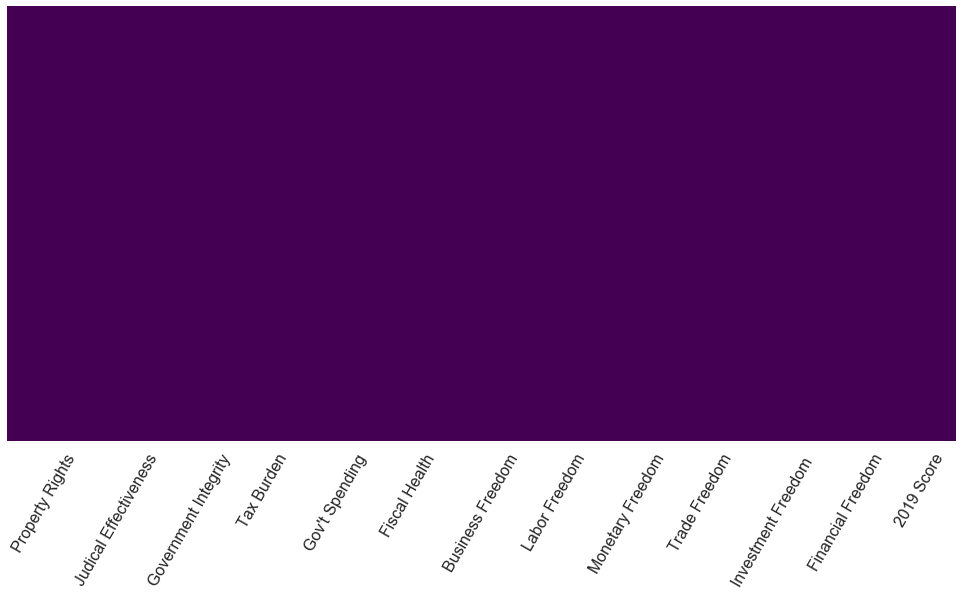

In [10]:
# check for remaining nulls - solid color heatmap indicates no nulls

plt.figure(figsize = (17, 8))
sns.heatmap(data_c.isnull(),yticklabels=False,cbar=False,cmap ='viridis')
plt.tick_params(labelsize = 16, rotation = 60)

plt.show()

In [ ]:
# excellent - no nulls!

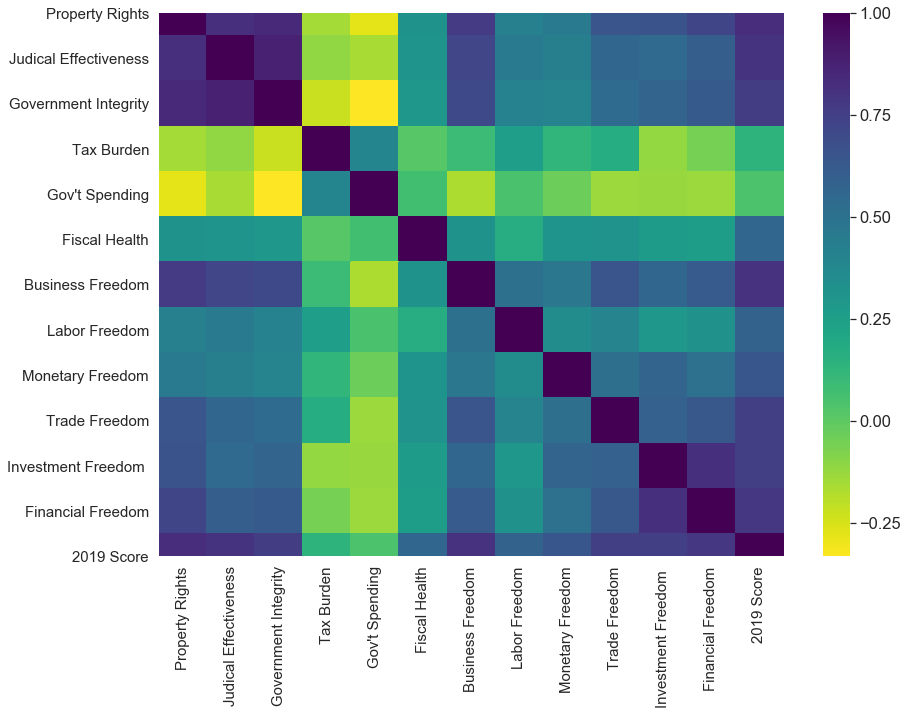

In [11]:
# plot correlation matrix to examine for any colinearity or near-colinearity

plt.figure(figsize = (14, 10))
sns.heatmap(data_c.corr(), cmap = 'viridis_r')
plt.tick_params(labelsize = 15)
plt.show()

In [ ]:
# the correltion matrix shows: 
    # high degree of correlation between Property Rights, Judicial Effectiveness and Goverment Integrity
        # to avoid near-colinearity keep only Property Rights
    # high degree of correlation between Investment Freedom and Financial Freedom
        # to avoid near-colinearity keep only Investment Freedom

In [12]:
data_c.columns

Index(['Property Rights', 'Judical Effectiveness', 'Government Integrity',
       'Tax Burden', 'Gov't Spending', 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
       'Investment Freedom ', 'Financial Freedom', '2019 Score'],
      dtype='object')

In [13]:
data_c = data_c[['Property Rights', 'Tax Burden', "Gov't Spending", 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom', 'Investment Freedom ', '2019 Score']]
data_c.head(5)

,Property Rights,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,2019 Score
0,19.6,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10.0,51.5
1,54.8,86.3,73.9,80.6,69.3,52.7,81.5,87.8,70.0,66.5
2,31.6,76.4,48.7,18.7,61.6,49.9,74.9,67.4,30.0,46.2
3,35.9,83.9,80.7,58.2,55.7,58.8,55.4,61.2,30.0,50.6
4,47.8,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55.0,52.2


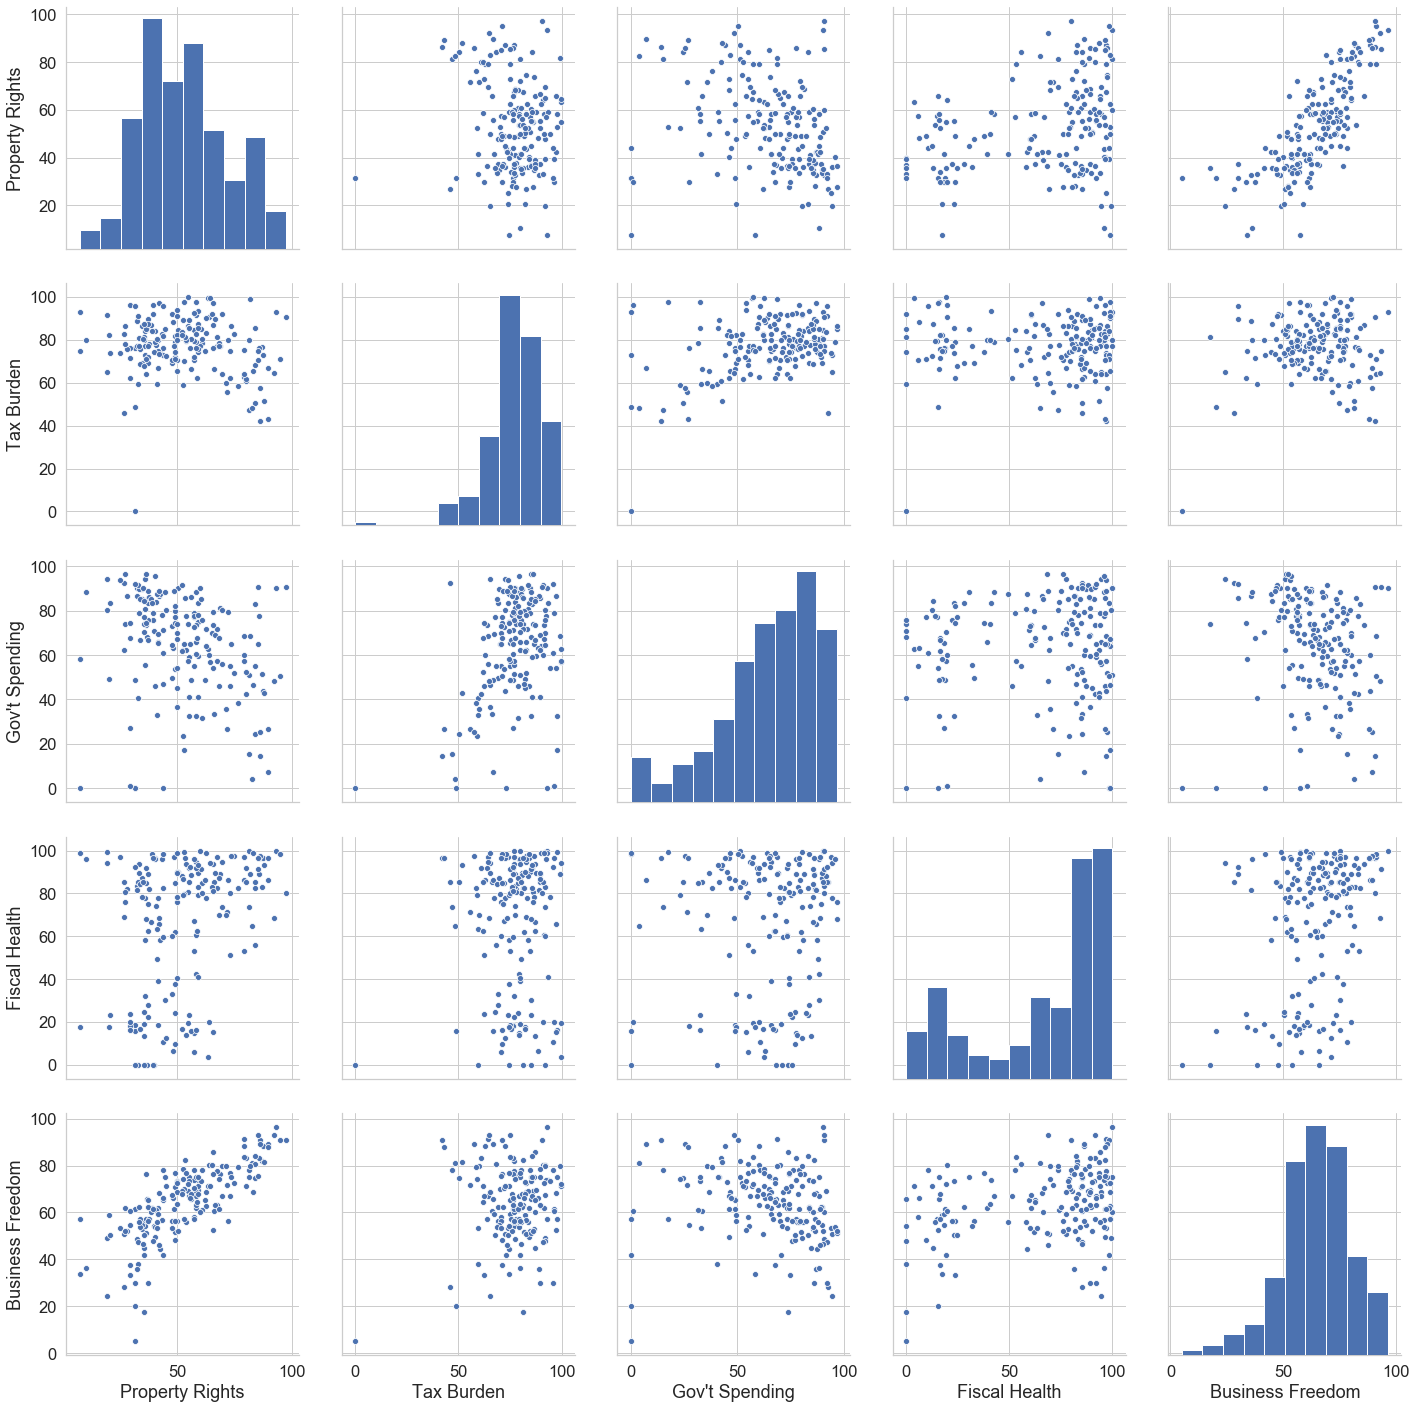

In [14]:
# create pairplot with first half of data for better readability

sns.pairplot(data_c.iloc[:, 0:5], height = 4, aspect = 1)
plt.tight_layout
plt.show()

In [ ]:
# the plots do not show any abnormal feature behavior 
# however, plots show that there are points = 0 in Tax Burden, Gov't Spending and Fiscal Health

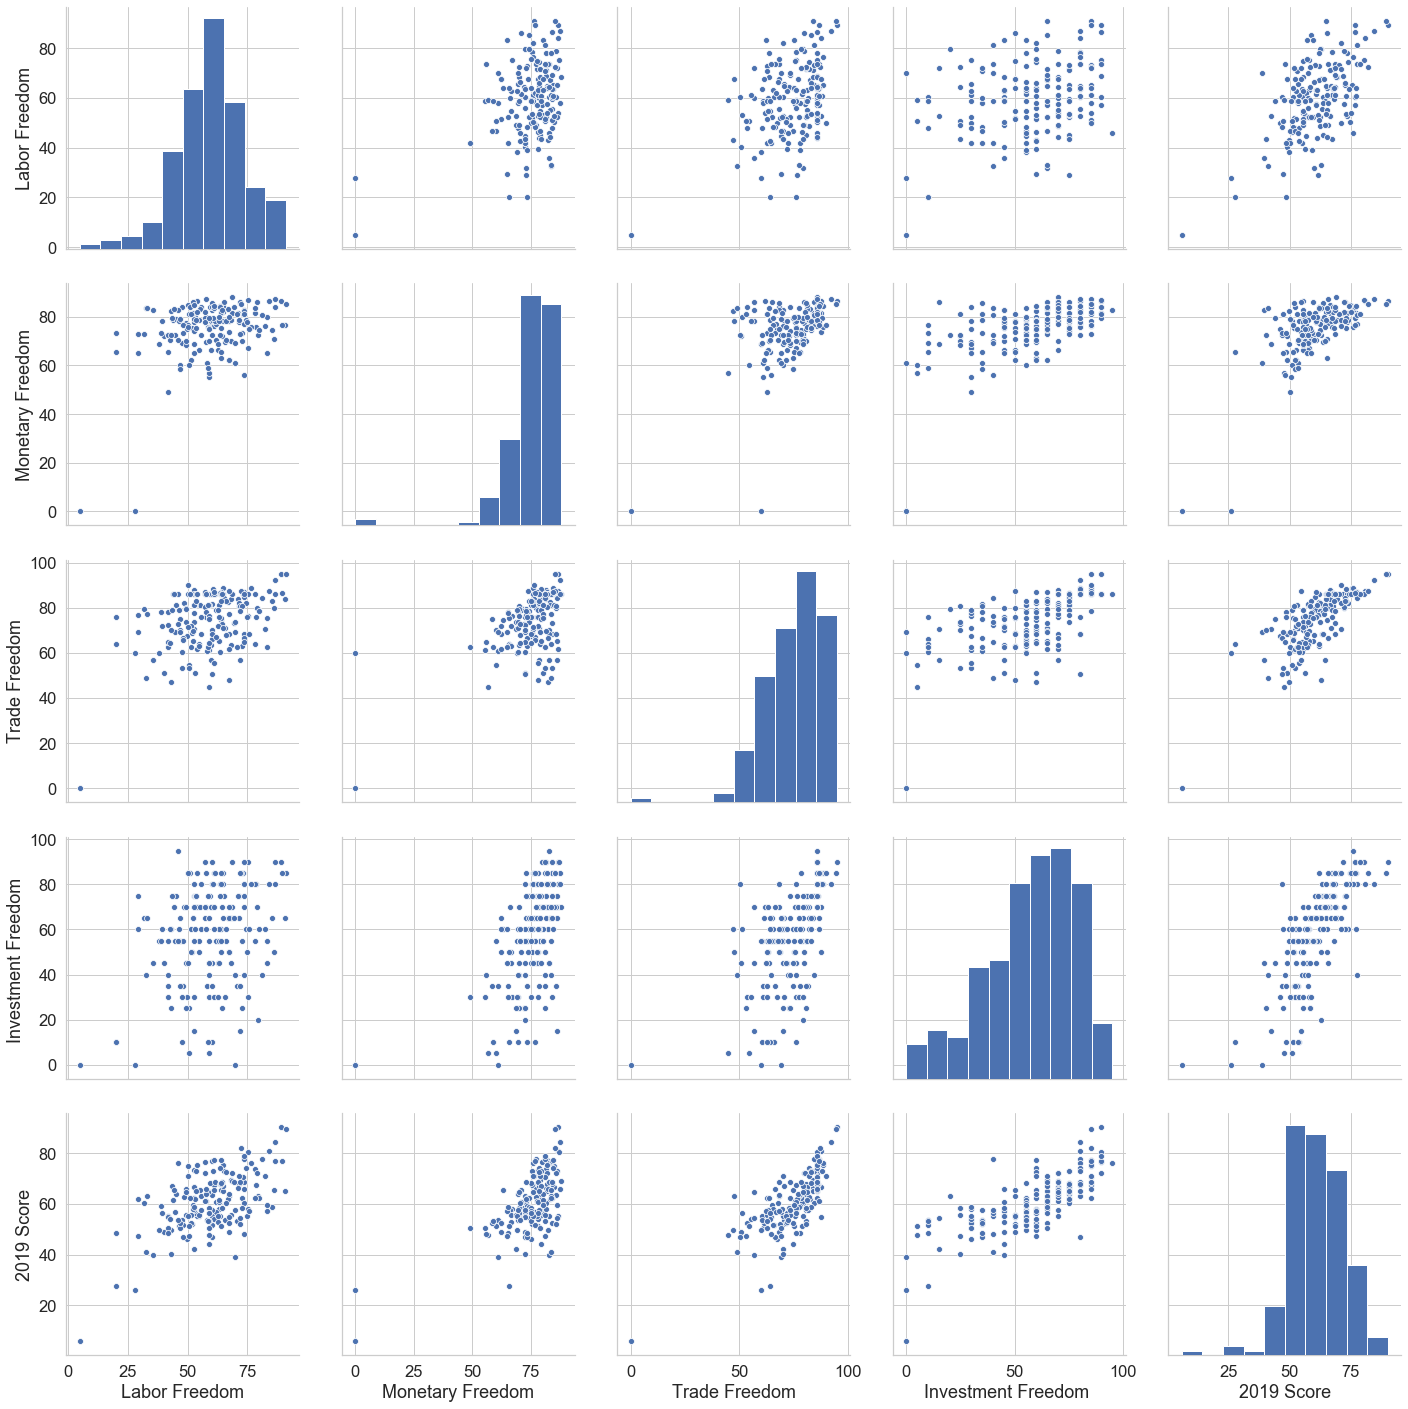

In [15]:
# create pairplot with second half of data

sns.pairplot(data_c.iloc[:, 5:], height = 4, aspect = 1)
plt.tight_layout
plt.show()

In [ ]:
# smilarly here, some data points are 0 in Monetary Freedom, Trade Freedom, and Financial Freedom
# it is very unlikely that these are real 0 scores given how far off the 0 points are from the rest of the data points
# the conclusion is that these 0s represent missing data and we need to replace the 0 values with something more appropriate
    # as a first order approximation we will use the corresponding means

In [16]:
data_c.columns # print columns to have them handy for the code that follows

Index(['Property Rights', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', '2019 Score'],
      dtype='object')

In [17]:
def replaceZeroData(data):
    
    for col in ['Property Rights', 'Tax Burden', "Gov't Spending", 'Fiscal Health', 'Business Freedom', 
                'Labor Freedom', 'Monetary Freedom', 'Trade Freedom', 'Investment Freedom ', '2019 Score']:
        
        for i in range(len(data)):
            
            if data[col].iloc[i] == 0:
                
                print(col) # allows us to see which columns have data points = 0
                
                print(i) # and the row index for these data points
                
                data[col].iloc[i] = round((data[col].mean()), 1)
            
        else:
            
            data[col].iloc[i] = data[col].iloc[i]

In [18]:
# replace 0 data points

replaceZeroData(data_c)

Tax Burden
87
Gov't Spending
42
Gov't Spending
86
Gov't Spending
87
Gov't Spending
110
Fiscal Health
38
Fiscal Health
50
Fiscal Health
53
Fiscal Health
61
Fiscal Health
87
Fiscal Health
94
Monetary Freedom
87
Monetary Freedom
176
Trade Freedom
87
Investment Freedom 
53
Investment Freedom 
87
Investment Freedom 
176


In [ ]:
# quick check by creating the same pairplots again

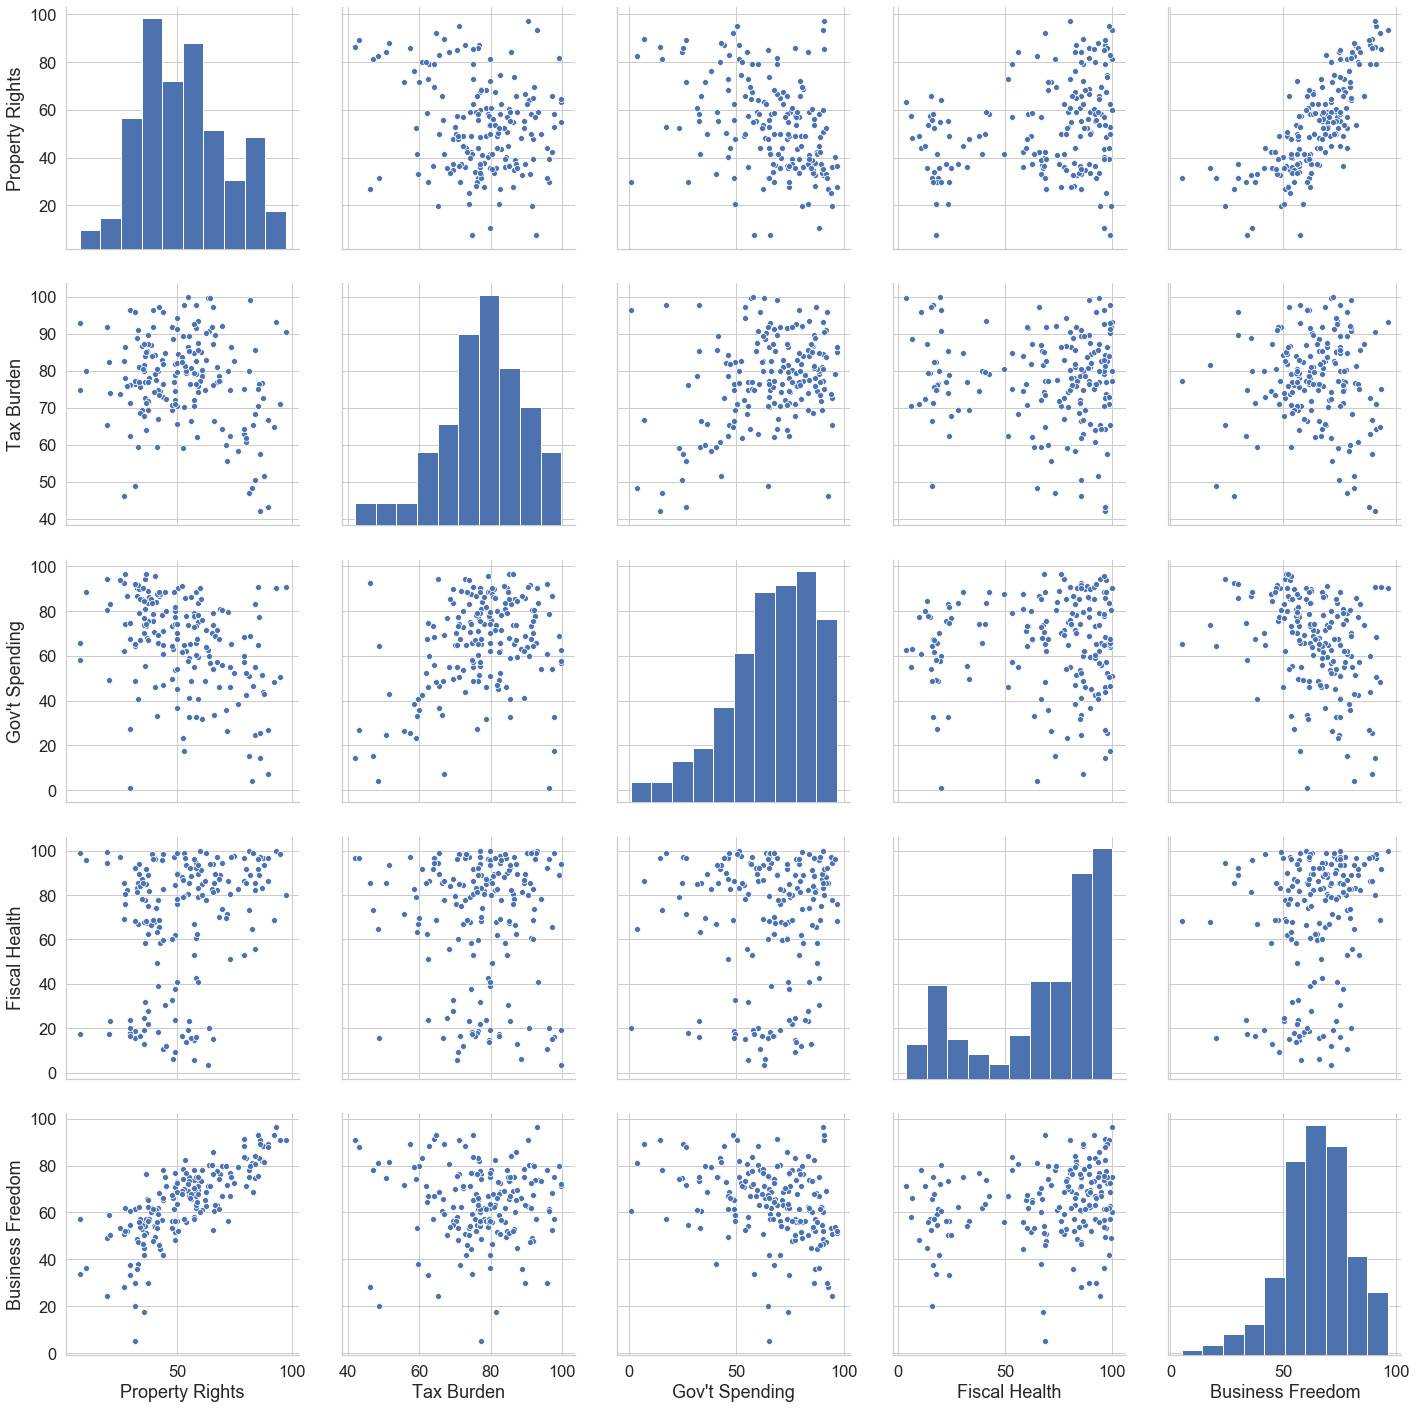

In [19]:
# first data half

sns.pairplot(data_c.iloc[:, 0:5], height = 4, aspect = 1)
plt.tight_layout
plt.show()

In [20]:
# Gov't Spending has a point which is very close to 0 - let's quickly check its value

min(data_c["Gov't Spending"])

0.9

In [ ]:
# this value is really close to 0; 
# however, since we cannot be sure that this was an entry error and there are points close to it, we will accept it

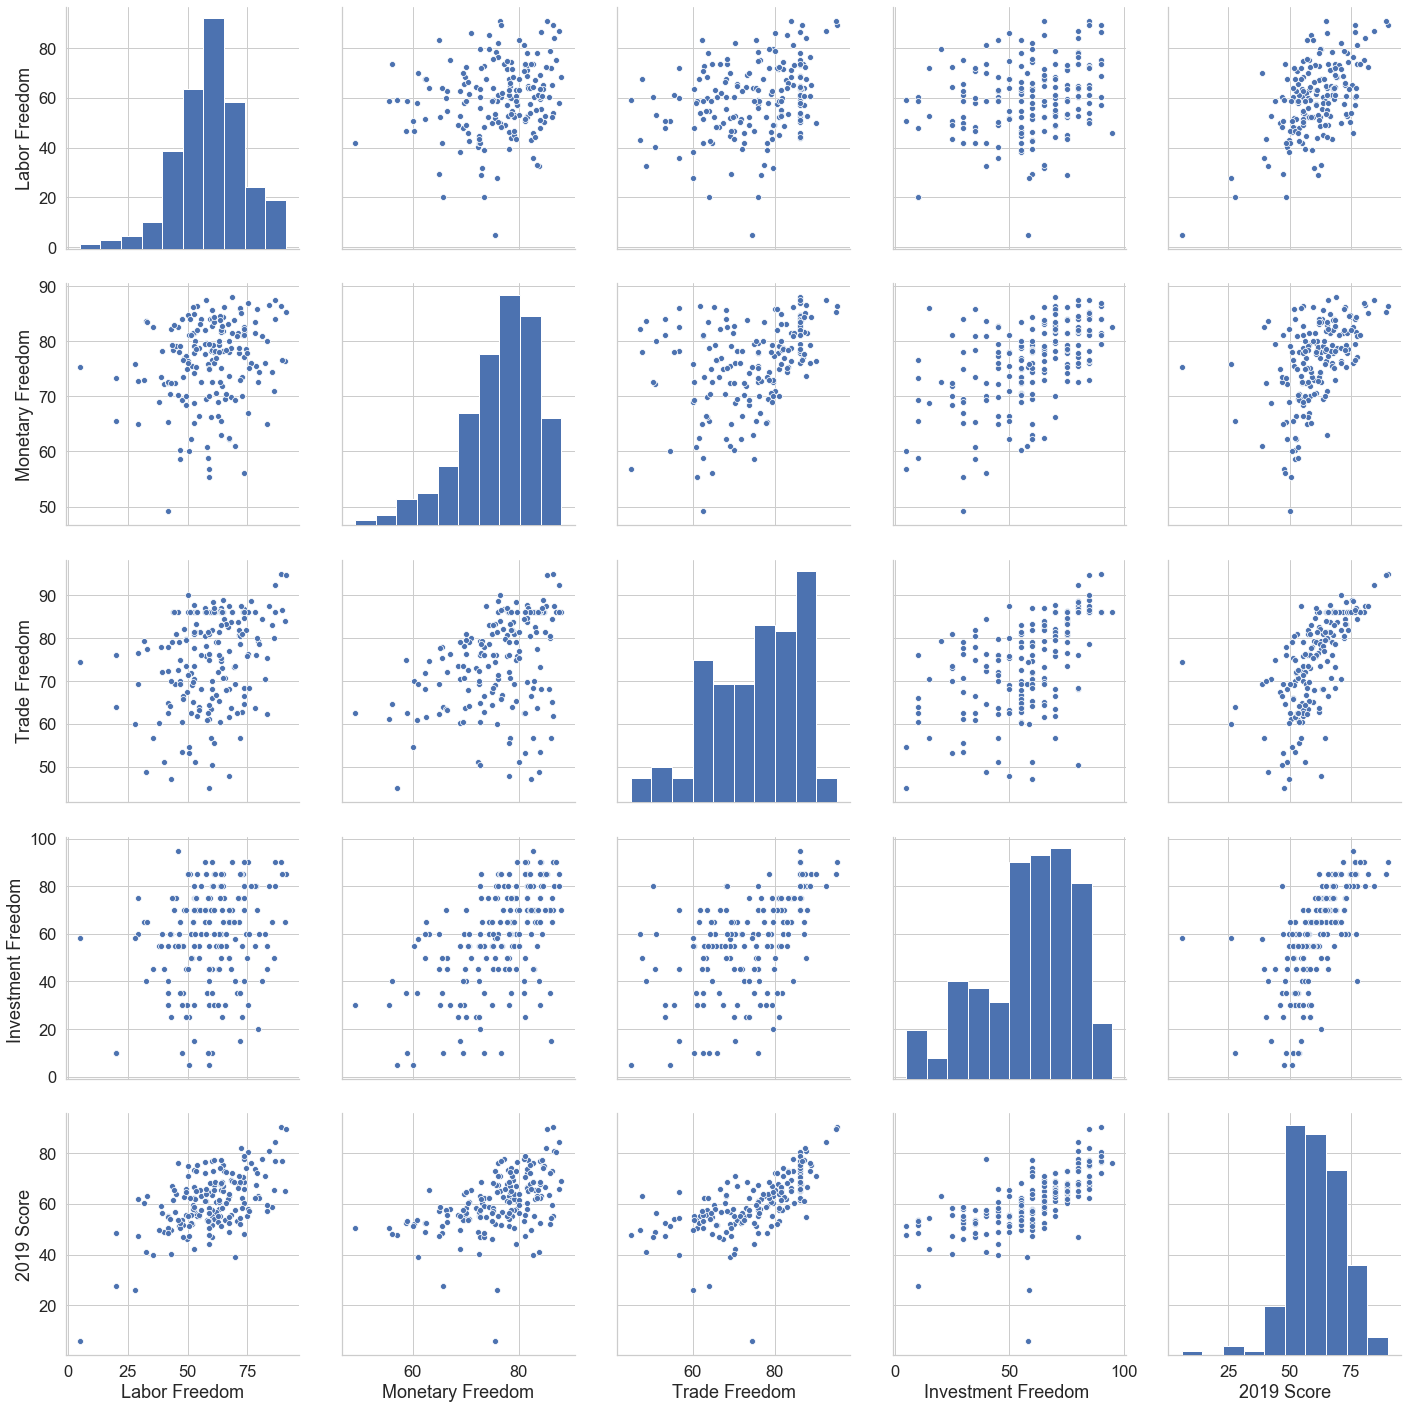

In [21]:
#second data half

sns.pairplot(data_c.iloc[:, 5:], height = 4, aspect = 1)
plt.tight_layout
plt.show()

In [22]:
# check the data point with a very small value in 2019 Score
min(data_c.iloc[:, -1])

5.9

In [ ]:
# again, we will have to accept this data point despite the low value

In [ ]:
# we are ready to create model and use it with data - in this project we will use Linear Regression

In [23]:
# separate data into features, X, and target, y

X = data_c.iloc[:, :-1].values # features - all data columns, but last
y = data_c.iloc[:, -1].values # target - last data column

In [24]:
# split data in train/test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
# create Linear Regession model and use it with data

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# train the model with training set
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# make predictions using test features set
y_pred = regressor.predict(X_test)

In [27]:
# plot coefficients

coeff_data = pd.DataFrame(regressor.coef_, data_c.iloc[:, :-1].columns, columns=['Coefficient'])
coeff_data

,Coefficient
Property Rights,0.183020
Tax Burden,0.031414
Gov't Spending,0.111794
Fiscal Health,0.077224
Business Freedom,0.260371
Labor Freedom,0.139410
Monetary Freedom,0.126166
Trade Freedom,0.058219
Investment Freedom,0.104326


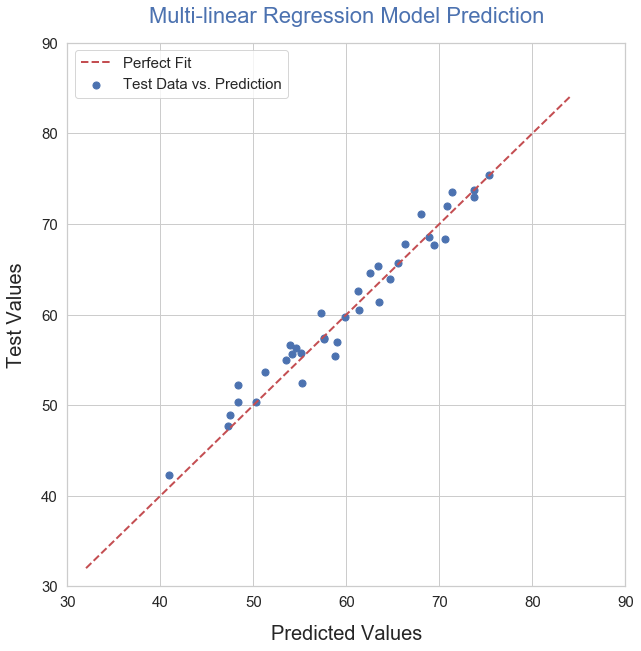

In [29]:
# compare predictions to the test target, y_test

# create data points for a straight line representing a perfect fit to the y_test data points 
y_line = np.arange(int(y_test.min()) - 10, int(y_test.max()) + 10)

# set axes limits - adjust if neccessary
x_min = 30
x_max = 90
d_x = 10

y_min = 30
y_max = 90
d_y = 10

plt.figure(figsize = (10, 10))
ax = plt.axes()

ax.set_xlim(x_min, x_max)
ax.set_xticks(np.arange(x_min, x_max + d_x, d_x))

ax.set_ylim(y_min, y_max)
ax.set_yticks(np.arange(y_min, y_max + d_y, d_y))

plt.scatter(y_pred, y_test, s = 50, c = 'b', label = 'Test Data vs. Prediction')
plt.plot(y_line, y_line, 'r--', lw = 2, label = 'Perfect Fit')
plt.xlabel('Predicted Values', fontsize = 20, labelpad = 15)
plt.ylabel('Test Values', fontsize = 20, labelpad = 15)
plt.title('Multi-linear Regression Model Prediction', fontsize = 22, c = 'b', pad = 20)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

In [ ]:
# predcitions are very close to the true target values, y_test
# the straight red dash line represents the ideal case when the prediction points are equal to the target values
# however, in reality we can never expect to have pefect fit
# in fact, we should be looking for something abnormal/wrong with the data, if we get a perfect fit from the model!!!

In [ ]:
# question: can we do (a little) better?
# apply Backward Elimination using features p-value

In [30]:
# because we will use statsmodels we need to add a column of ones to X to simulate the constant term in the regression

X = np.append(arr = np.ones((len(X), 1)).astype(int), values = X, axis = 1)
X

array([[ 1. , 19.6, 91.7, ..., 76.7, 66. , 10. ],
       [ 1. , 54.8, 86.3, ..., 81.5, 87.8, 70. ],
       [ 1. , 31.6, 76.4, ..., 74.9, 67.4, 30. ],
       ...,
       [ 1. , 49.8, 79.7, ..., 68.9, 79.2, 30. ],
       [ 1. , 45. , 72.3, ..., 70.3, 72.6, 55. ],
       [ 1. , 29.7, 62.3, ..., 72.4, 70. , 25. ]])

In [ ]:
# first column now is ones and the rest of the columns are the features from X

In [31]:
# set an array for the Backward Elimination

X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]] # we start with all features

In [32]:
# create the model from statsmodels.api

import statsmodels.api as sm

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # using Ordinary Least Squares (OLS)
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           2.35e-88
Time:                        16:29:25   Log-Likelihood:                -463.36
No. Observations:                 180   AIC:                             946.7
Df Residuals:                     170   BIC:                             978.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.8642      3.639     -1.886      0.061     -14.048       0.320
x1             0.1880      0.025      7.428      0.000       0.138       0.238
x2             0.0318      0.024      1.338      0.183      -0.015       0.079
x3             0.1110      0.014      7.870      0.000       0.083       0.139
x4             0.0809      0.009      8.835      0.000       0.063       0.099
x5             0.2540      0.027      9.571      0.000       0.202       0.306
x6             0.1331      0.020      6.551      0.000       0.093       0.173
x7             0.0999      0.040      2.515      0.013       0.021       0.178
x8             0.0552      0.034      1.641      0.103      -0.011       0.121
x9             0.1079      0.017      6.326      0.000       0.074       0.142
==============================================================================
Omnibus:                      195.499   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8586.184
Skew:                          -3.988   Prob(JB):                         0.00
Kurtosis:                      35.882   Cond. No.                     3.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# examine p-values from table; set significance threshold to 0.05 - everything above is non-siginificant
# the variable with largest p-value here is x2 with column index = 2; so, for the next step we will remove it from X_opt

In [33]:
X_opt = X[:, [0, 1, 3, 4, 5, 6, 7, 8, 9]] # remove colum with index = 2 and repeat

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     243.0
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           3.54e-89
Time:                        16:29:42   Log-Likelihood:                -464.31
No. Observations:                 180   AIC:                             946.6
Df Residuals:                     171   BIC:                             975.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3714      3.472     -1.547      0.124     -12.225       1.482
x1             0.1807      0.025      7.294      0.000       0.132       0.230
x2             0.1167      0.013      8.661      0.000       0.090       0.143
x3             0.0800      0.009      8.742      0.000       0.062       0.098
x4             0.2589      0.026      9.831      0.000       0.207       0.311
x5             0.1380      0.020      6.893      0.000       0.098       0.178
x6             0.0985      0.040      2.474      0.014       0.020       0.177
x7             0.0652      0.033      1.984      0.049       0.000       0.130
x8             0.1044      0.017      6.180      0.000       0.071       0.138
==============================================================================
Omnibus:                      185.943   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7309.994
Skew:                          -3.710   Prob(JB):                         0.00
Kurtosis:                      33.325   Cond. No.                     2.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# results show that the constant term (column of ones) has largest p, so we will remove it, as well

In [34]:
X_opt = X[:, [1, 3, 4, 5, 6, 7, 8, 9]] # remove colum with index = 0 and repeat

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              7927.
Date:                Mon, 27 Jan 2020   Prob (F-statistic):                   1.65e-216
Time:                        16:29:54   Log-Likelihood:                         -465.56
No. Observations:                 180   AIC:                                      947.1
Df Residuals:                     172   BIC:                                      972.7
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1905      0.024      7.922      0.000       0.143       0.238
x2             0.1085      0.012      8.721      0.000       0.084       0.133
x3             0.0807      0.009      8.791      0.000       0.063       0.099
x4             0.2543      0.026      9.679      0.000       0.202       0.306
x5             0.1345      0.020      6.733      0.000       0.095       0.174
x6             0.0535      0.027      1.961      0.052      -0.000       0.107
x7             0.0411      0.029      1.415      0.159      -0.016       0.098
x8             0.1107      0.016      6.721      0.000       0.078       0.143
==============================================================================
Omnibus:                      188.606   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7599.142
Skew:                          -3.790   Prob(JB):                         0.00
Kurtosis:                      33.916   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# the feature x7 with column index = 8 in X has largest p
# eliminate it and repeat

In [35]:
X_opt = X[:, [1, 3, 4, 5, 6, 7, 9]] # remove colum with index = 8 and repeat

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              9007.
Date:                Mon, 27 Jan 2020   Prob (F-statistic):                   4.52e-218
Time:                        16:30:14   Log-Likelihood:                         -466.60
No. Observations:                 180   AIC:                                      947.2
Df Residuals:                     173   BIC:                                      969.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1973      0.024      8.346      0.000       0.151       0.244
x2             0.1109      0.012      8.973      0.000       0.087       0.135
x3             0.0817      0.009      8.896      0.000       0.064       0.100
x4             0.2623      0.026     10.190      0.000       0.211       0.313
x5             0.1361      0.020      6.805      0.000       0.097       0.176
x6             0.0757      0.022      3.379      0.001       0.031       0.120
x7             0.1137      0.016      6.946      0.000       0.081       0.146
==============================================================================
Omnibus:                      175.293   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5875.642
Skew:                          -3.432   Prob(JB):                         0.00
Kurtosis:                      30.135   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# all remaining features meet the significance threshold!
# more importantly, even though we have eliminated a feature Adjusted R2 remain as high as in the previous step
# thus, a multiple linear regression model using the last selected features will be most accurate

In [36]:
# due to the addition of ones, features with indexes from X correspond to features from data_c as follows
# X[:, [1, 3, 4, 5, 6, 7, 9]] --> data_c[:, [0, 2, 3, 4, 5, 6, 8]] (X_indices - 1)

data_c.iloc[:, [0, 2, 3, 4, 5, 6, 8]].head(5)

,Property Rights,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Investment Freedom
0,19.6,80.3,99.3,49.2,60.4,76.7,10.0
1,54.8,73.9,80.6,69.3,52.7,81.5,70.0
2,31.6,48.7,18.7,61.6,49.9,74.9,30.0
3,35.9,80.7,58.2,55.7,58.8,55.4,30.0
4,47.8,49.5,33.0,56.4,46.9,60.2,55.0


In [ ]:
# the above seven features, out of 12 total initial features, play significant role in determining the overall score!

In [37]:
# use these features with the linear model and see if model predictions will improve

X_r = data_c.iloc[:, [0, 2, 3, 4, 5, 6, 8]].values # new reduced number of features

X_train, X_test, y_train, y_test = train_test_split(X_r, y, test_size = 0.2, random_state = 0) # replace X with the new X_r

In [38]:
# train and predict

regressor.fit(X_train, y_train)
y_pred_r = regressor.predict(X_test)

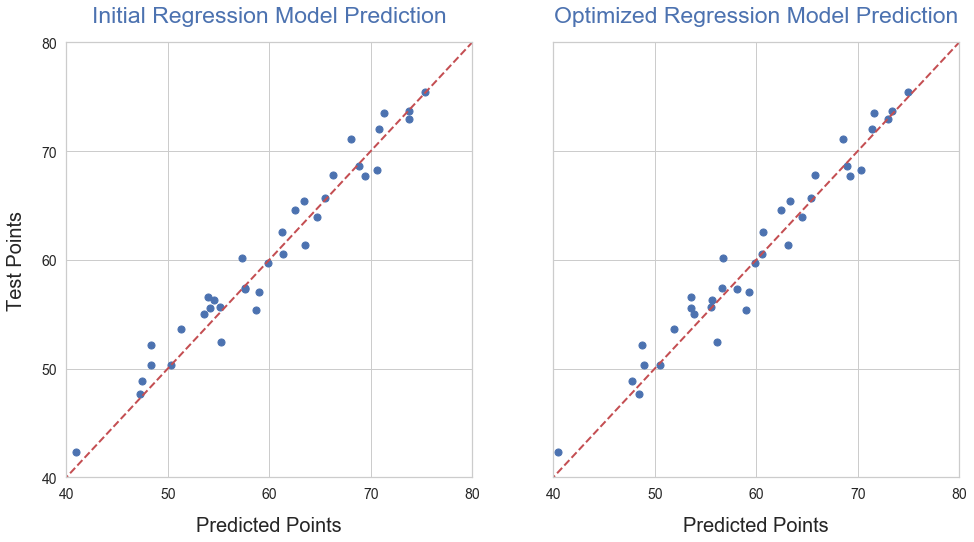

In [39]:
# compare predictions to the test points, y_test with original model and the new one

# create data points for a straight line representing a perfect fit to the y_test data points 
y_line = np.arange(int(y_test.min()) - 10, int(y_test.max()) + 10)

# set axes limits - adjust if neccessary
x_min = 40
x_max = 80
d_x = 10

y_min = 40
y_max = 80
d_y = 10

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16,8))

# Initial Model
axes[0].scatter(y_pred, y_test, s = 50, c = 'b')
axes[0].plot(y_line, y_line, 'r--', lw = 2)
axes[0].set_title('Initial Regression Model Prediction', fontsize = 23, c = 'b', pad = 20)
axes[0].set_xlabel('Predicted Points', fontsize = 20, labelpad = 15)
axes[0].set_ylabel('Test Points', fontsize = 20, labelpad = 15)
axes[0].set_xlim(x_min, x_max)
axes[0].set_xticks(np.arange(x_min, x_max + d_x, d_x))
axes[0].set_ylim(y_min, y_max)
axes[0].set_yticks(np.arange(y_min, y_max + d_y, d_y))
axes[0].tick_params(labelsize = 14)


# Optimized Model
axes[1].scatter(y_pred_r, y_test, s = 50, c = 'b')
axes[1].plot(y_line, y_line, 'r--', lw = 2)
axes[1].set_title('Optimized Regression Model Prediction', fontsize = 23, c = 'b', pad = 20)
axes[1].set_xlabel('Predicted Points', fontsize = 20, labelpad = 15)
axes[1].set_xlim(x_min, x_max)
axes[1].set_xticks(np.arange(x_min, x_max + d_x, d_x))
axes[1].set_ylim(y_min, y_max)
axes[1].set_yticks(np.arange(y_min, y_max + d_y, d_y))
axes[1].tick_params(labelsize = 14)

plt.show()

In [ ]:
# visually it is difficult for the human eye to decern the difference
# based on the Adjusted R2 the optimized model is selected as the final model

In [ ]:
# This concludes our investigation of the new metrics introduced
# We have found that:
    # 1) the new features do not show abnormal behavior
    # 2) more than half of these features (7 out of 12) play significant role in determining the overal ranking score
    # 3) using these feature one can predict with very high accuracy the ranking score
# Thus, we can conclude that the new matrics introduced is sound and the ranking based on it can be believed